**Lilian JAOUANNE**

**Bastian GARÇON**

Mecatro 3A FISA Promo 2026

# Base de Données sur la Qualité des Vins de Vinho Verde

## Origine des données

Les données sont extraites de l'[UCI Machine Learning Repository](https://archive.ics.uci.edu) et se rapportent spécifiquement aux variantes rouge et blanche des vins de Vinho Verde, une région notable du Portugal.

## Composition de la Base de Données

La base de données se divise en deux ensembles distincts, l'un pour les vins rouges et l'autre pour les vins blancs. Chaque ensemble comprend plusieurs variables qui mesurent les caractéristiques physicochimiques des vins ainsi que leur qualité sensorielle évaluée :
- Fixed Acidity: Acidité totale du vin, incluant les acides fixes et volatils.
- Volatile Acidity: Concentration en acide acétique, influant sur le goût vinaigré du vin.
- Citric Acid: Acidité apportée par l'ajout d'acide citrique, ajustant l'acidité des vins.
- Residual Sugar: Quantité de sucre restant post-fermentation.
- Chlorides: Teneur en chlorures, ou sel, du vin.
- Free Sulfur Dioxide: Quantité de dioxyde de soufre libre, prévenant l'oxydation et la croissance microbienne.
- Total Sulfur Dioxide: Totalité du dioxyde de soufre présent dans le vin.
- Density: Densité du vin, souvent liée à sa teneur en alcool.
- pH: Indice de l'acidité ou basicité du vin.
- Sulphates: Taux de sulfates ajoutés, augmentant le SO2 et aidant à la conservation du vin.
- Alcohol: Pourcentage d'alcool contenu dans le vin.
- Quality: Note de qualité attribuée par des dégustateurs, sur une échelle de 0 à 10.

## Problématiques Principales

### 1. Identification des Variables Influant sur la Densité

- **Objectif** : Détecter les variables physicochimiques qui influencent significativement la densité du vin, pour les vins rouges et blancs.
- **Approche** : Sélection de variables pertinentes à travers des techniques statistiques pour minimiser le bruit et se concentrer sur les contributeurs clés à la densité du vin.

### 2. Modélisation de la Densité du Vin

- **Objectif** : Construire un modèle de régression linéaire multiple pour prédire la densité du vin à partir des variables sélectionnées, et comparer les modèles pour les vins rouges contre les vins blancs.
- **Approche** : Développement et validation d'un modèle de régression, évaluation de la précision et des performances du modèle, et analyse des interactions entre les variables.

### 3. Comparaison des Distributions de Variables Spécifiques

- **Objectif** : Examiner comment les distributions des variables telles que le pH, la densité, et l'acidité volatile varient entre les vins rouges et blancs.
- **Approche** : Utilisation de tests de normalité et d'analyse de variance (ANOVA) pour évaluer les différences statistiques entre les deux types de vin.

### 4. Analyse des Associations entre Qualité du Vin et Autres Variables Catégorielles

- **Objectif** : Investiguer s'il existe des associations significatives entre les catégories de qualité du vin et d'autres variables catégorielles.
- **Approche** : Utilisation de tests statistiques pour évaluer l'association entre variables catégorielles et la qualité perçue du vin.

# Mise en pratique

## Librairies à importer

Avant toute chose, nous devons importer ces librairies :
- _Pandas_ : pour la partie dataframes
- _numpy_ : pour les tableaux
- _pyplot_ de _matplotlib_ : pour une visualisation graphique
- _seaborn_ : pour la visualisation de données
- _statmodels.api_ : pour le test ANOVA
- _shapiro_ de _scipy.stats_ : pour le test Shapiro puis _scipy.stats_ pour les fonctions statistiques.

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import shapiro
import scipy.stats as stats

## Importation des bases de données

On importe les deux base de données grâce à _pandas_

In [96]:
RED_WINE = pd.read_csv("Bases de données/winequality-red.csv", sep=';', decimal='.')
WHITE_WINE = pd.read_csv("Bases de données/winequality-white.csv", sep=';', decimal='.')

# 1. Identification des Variables Influant sur la Densité

On commence par vérifier quelles sont les variables corrélées à la densité. Pour cela on utilise la fonction suivante qui va prendre un jeu de données et supprimer les variables n'étant pas corrélées à la densité avec un risque de 5%. Pour cela on utilise la valeur **p** produite par le Test de **Pearson**. Si la valeur **p** est inférieur à 0.05 et la valeur absolue de la corrélation supérieur à 0.15, on garde la variable pour la régression linéaire multiple qui suivra.

In [97]:
def corr_data(data_set, variable:str):
    # Calculer les coefficients de corrélation et les valeurs p pour chaque variable par rapport à 'variable'
    correlations = {}
    p_values = {}
    variables_to_exclude = []

    for column in data_set.columns:
        if column != variable:  # éviter de comparer la varaible à corréler avec elle-même
            corr, p_val = stats.pearsonr(data_set[column], data_set[variable])
            correlations[column] = corr
            p_values[column] = p_val
        
            if abs(corr) < 0.15 or p_val > 0.05:
                variables_to_exclude.append(column)
    
    return data_set.drop(columns = variables_to_exclude)

A présent, nous pouvons appeler la fonction pour le vin rouge et blanc. On oublie d'y enlever la variable de **qualité** qui n'est pas continue. De ce fait, elle est considérée comme une variable catégorielle. On y enlève aussi la **densité** puisque c'est la variable que l'on cherche à prédire.

In [98]:
X_density_RED = corr_data(RED_WINE, 'density')
X_density_RED.drop(columns = ['quality', 'density'], inplace=True)

X_density_WHITE = corr_data(WHITE_WINE, 'density')
X_density_WHITE.drop(columns = ['quality', 'density'], inplace=True)

Maintenant, nous avons notre jeu de donnée avec les variables qui influent le plus sur la densité. On les affiche grâce à la fonction suivante.

In [99]:
print('Variables retenues pour la régression linéaire de la densité du :\nVIN ROUGE :')
print(X_density_RED.keys())
print('\nVIN BLANC :')
print(X_density_WHITE.keys())

Variables retenues pour la régression linéaire de la densité du :
VIN ROUGE :
Index(['fixed acidity', 'citric acid', 'residual sugar', 'chlorides', 'pH',
       'alcohol'],
      dtype='object')

VIN BLANC :
Index(['fixed acidity', 'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'alcohol'],
      dtype='object')


On voit que pour le vin rouge comme pour le vin blanc, les variables concervées pour expliquer la dentité sont :
- fixed acidity
- residual sugar
- chlorides
- alcohol

En revanche les varaibles :
- citric acid
- pH

Ne sont présentent que dans dans les variables expliquatives de la dentité du <span style="color: red;">vin rouge</span> et celle :
- free sulfur dioxide
- total sulfur dioxide

Que dans dans les variables expliquatives de la dentité du vin blanc.

# 3. Comparaison des Distributions de Variables Spécifiques

- **Objectif** : Examiner comment les distributions des variables telles que le pH, la densité, et l'acidité volatile varient entre les vins rouges et blancs.
- **Approche** : Utilisation de tests de normalité et d'analyse de variance (ANOVA) pour évaluer les différences statistiques entre les deux types de vin.

### Tests de normalité

On vérifiera la normalité des distributions des variables catégorielles pH, densité ainsi que l'acidité volatile pour chacune des deux bases de données. On affichera alors pour chacune de ces 3 variables continues histogrammes, boxplots et qq-plot pour étudier la normalité de façon graphique.

In [100]:
def plot_boxplot_histogram_qqplot(data, title, xlabel, ylabel):
    plt.figure(figsize=(18, 6))

    # Boxplot
    plt.subplot(1, 3, 1)
    sns.boxplot(y=data, color='lightblue', notch=True, flierprops={'marker':'o', 'markersize':8, 'markerfacecolor':'red'})
    plt.title(f'Boxplot of {title}')
    plt.ylabel(ylabel)

    # Histogramme
    plt.subplot(1, 3, 2)
    sns.histplot(data, kde=False)
    plt.title(f'Histogram of {title}')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    # QQ Plot
    plt.subplot(1, 3, 3)
    sm.qqplot(data, line='s', ax=plt.gca())
    plt.title(f'QQ Plot of {title}')
    
    # Ajout du titre global
    plt.suptitle(title, fontsize=15, y=0.95)  
    
    plt.tight_layout(rect=[0, 0, 1, 0.96])  # Ajuster le layout pour le titre global
    plt.show()

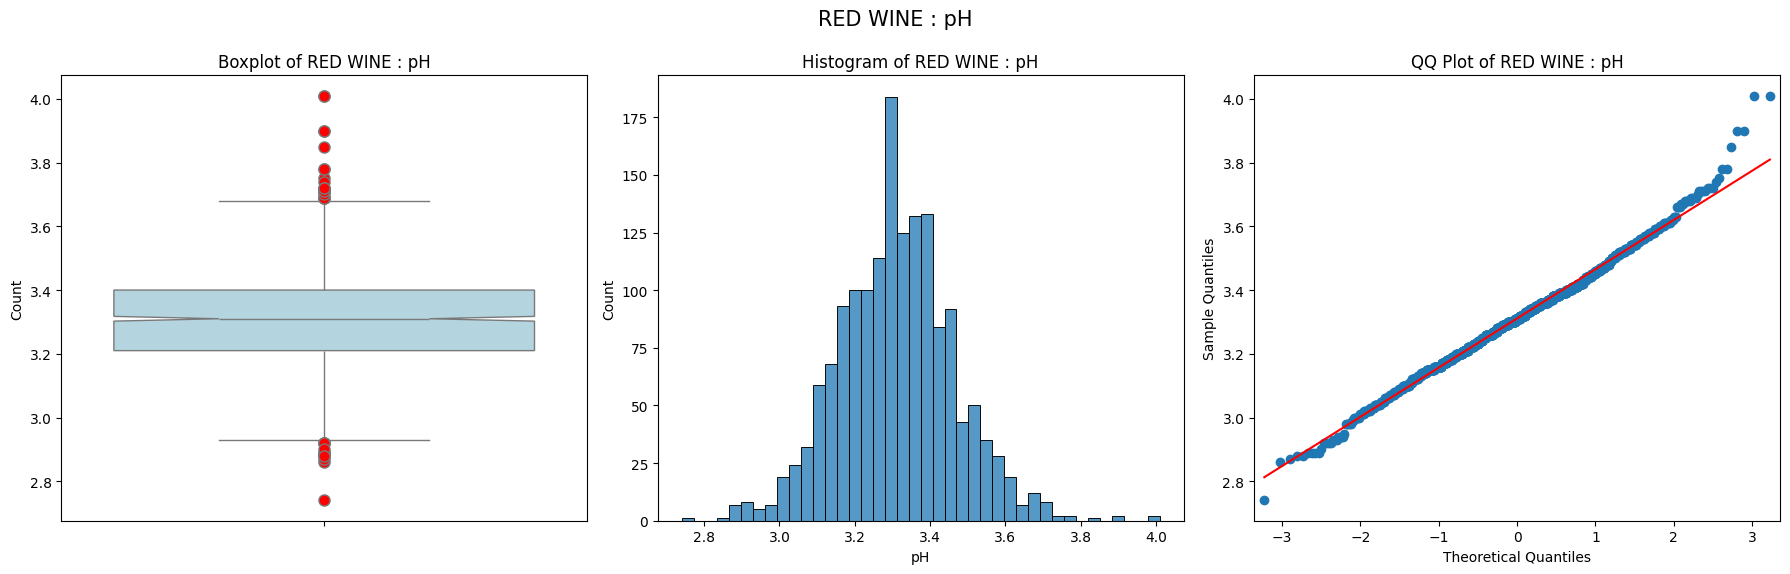

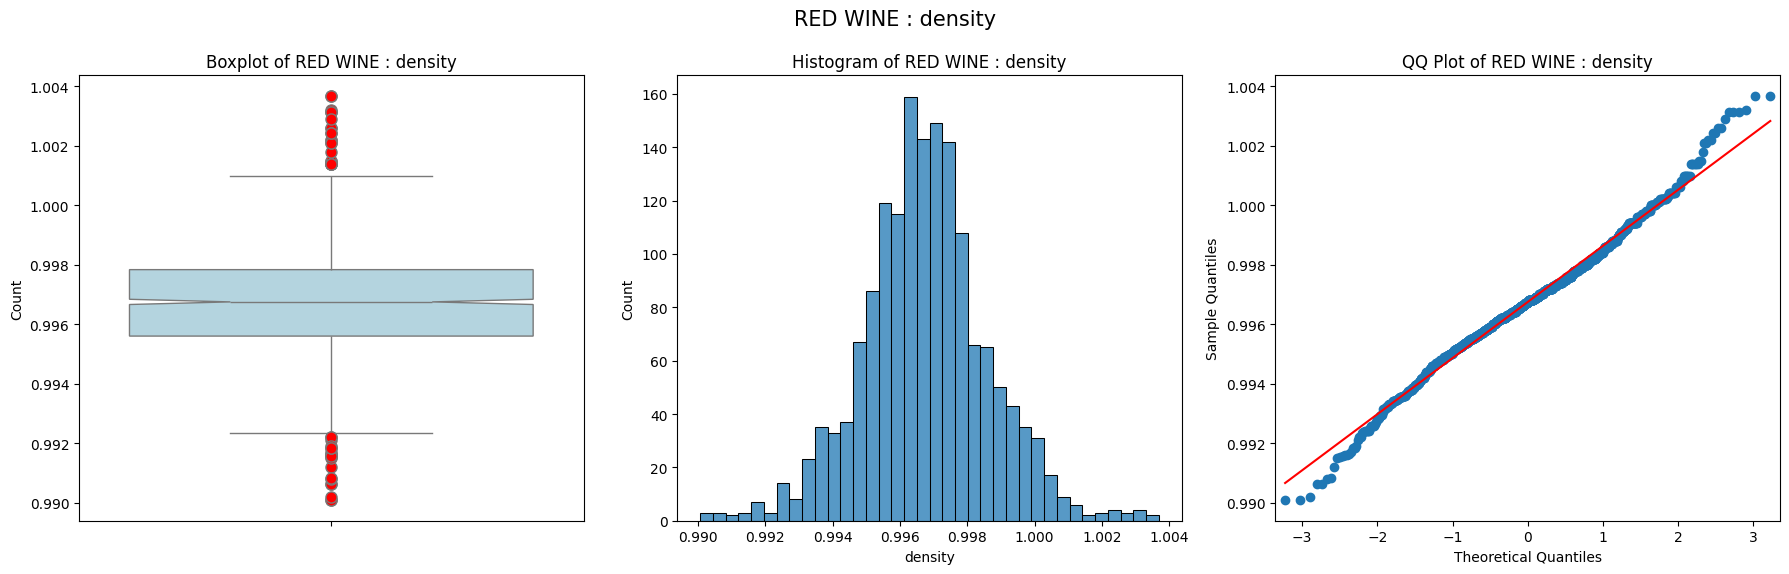

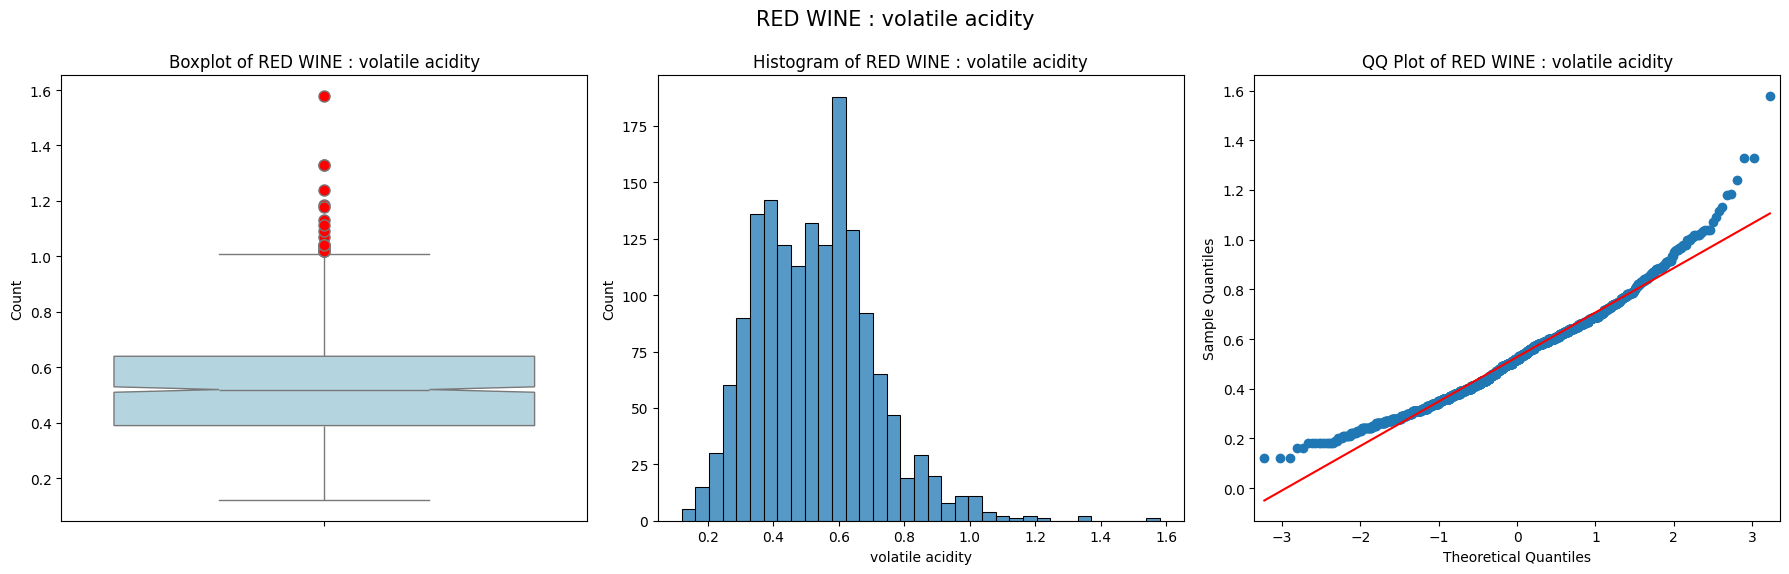

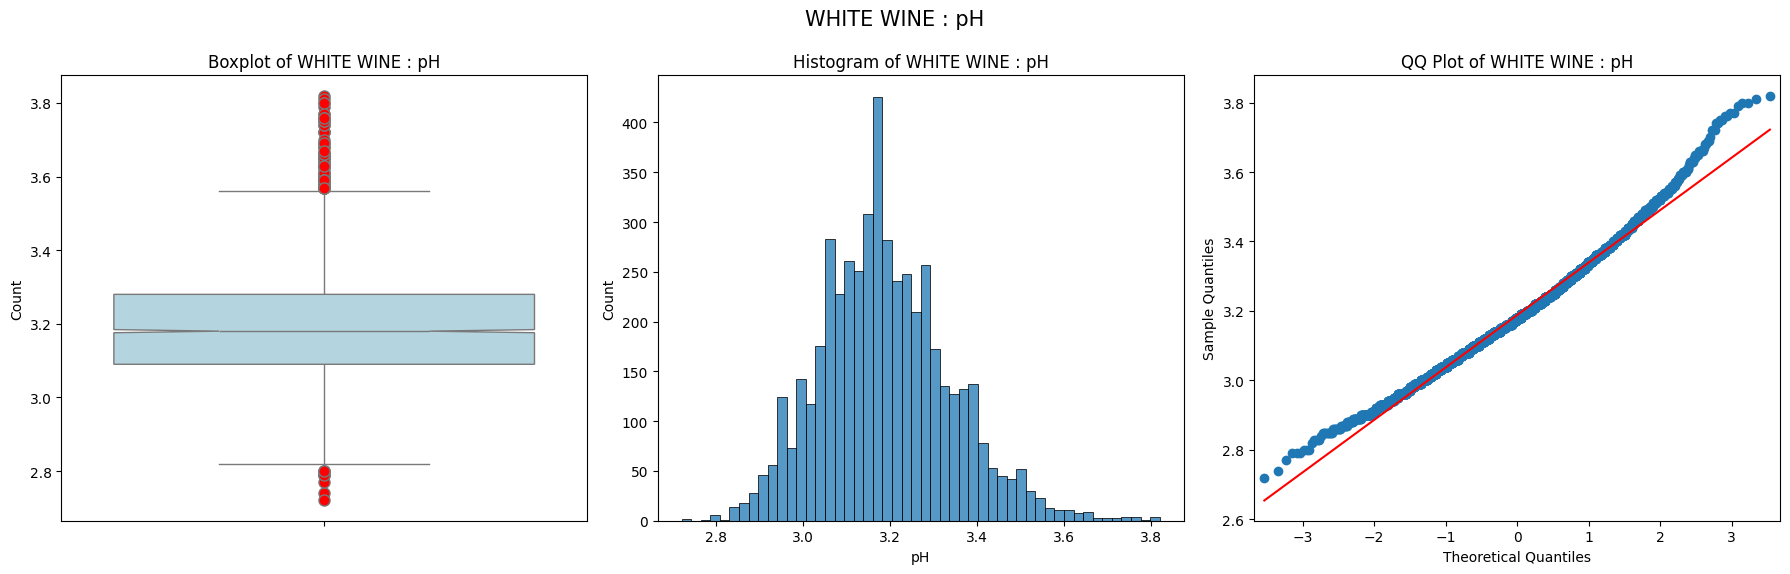

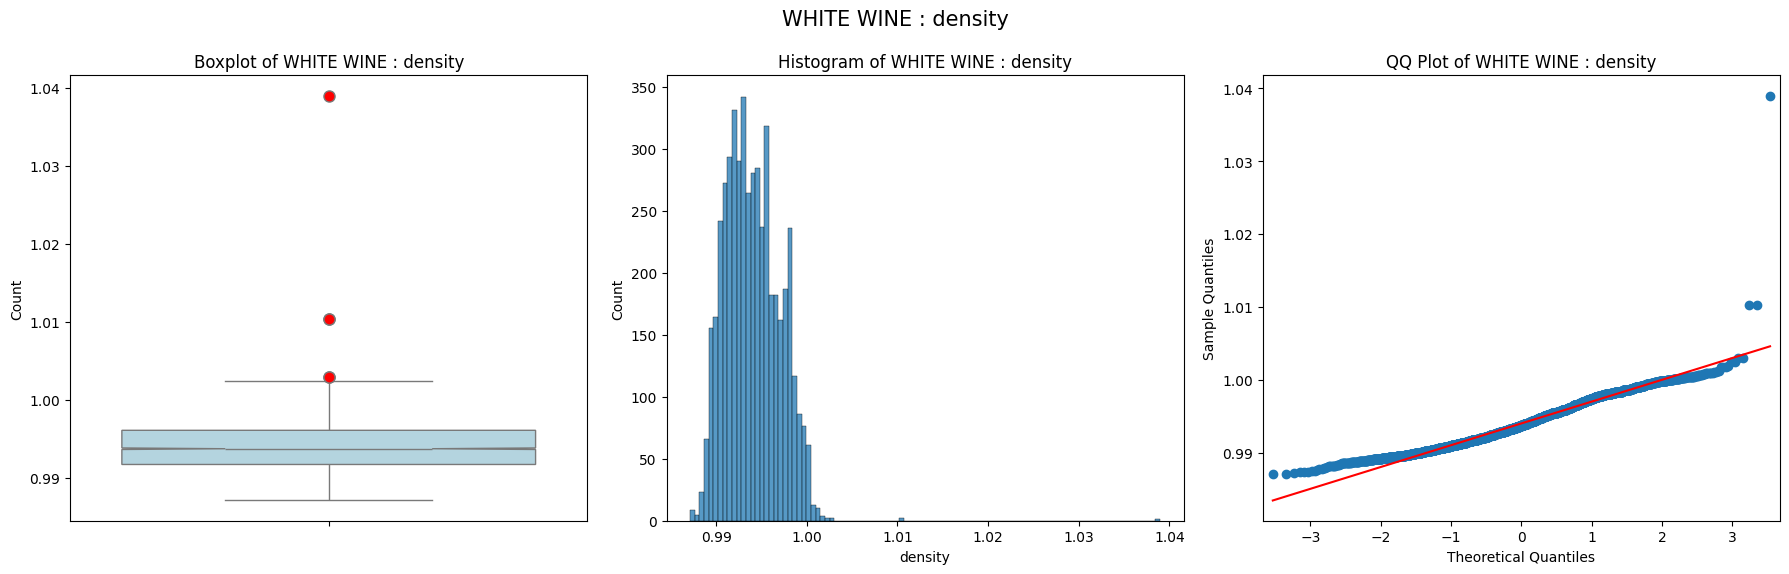

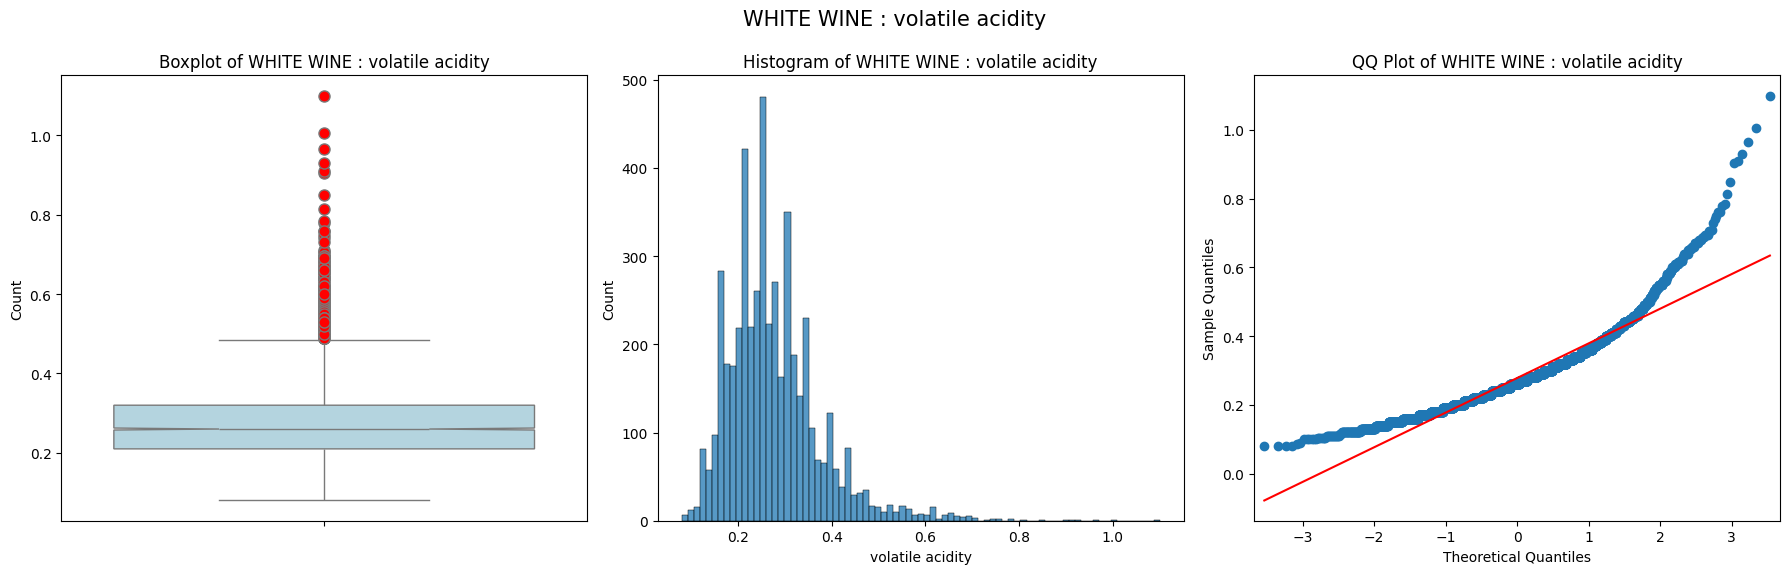

In [106]:
datasets = [(RED_WINE, 'RED WINE'), (WHITE_WINE, 'WHITE WINE')]

features = [('pH', 'pH', 'Count'), ('density', 'density', 'Count'), ('volatile acidity', 'volatile acidity', 'Count')]

for dataset, dataset_name in datasets:
    for feature, xlabel, ylabel in features:
        title = f'{dataset_name} : {feature}'
        plot_boxplot_histogram_qqplot(dataset[feature], title, xlabel, ylabel)

On observe un nombre important de données abérante / atypiques visualisables sur les boxplots par les données présentes à l'extrérieur des moustaches pour chacune des 3 variables ici étudiées. 
On observe de plus que les jeux de données de pH et de densité sont proches d'une loi normale à partir des qq-plot car les points s'alligne sur la droite Y = X malgré un comportement différent d'une distrubution normales aux odnnées extrêmes. On remarque également la distribution de ces variables sur les histogrammes.
La variable d'acidité volatile ne suit pas une loi normale.

On vérifie à présent cette normalité à partir d'un test de Shapiro Wilk, pour les varibles continues de densité et de pH :

In [108]:
def shapiro_wilk_test(data, title):
    
    data_clean = data.dropna()#remove NaN (missed) values which can't be handled by the Shapiro-wilk
    stat, p_value = shapiro(data_clean)#perfirming the shapiro wilk test
    
    #interpreting the result
    alpha = 0.05
    if p_value>alpha:
        print(f'{title} looks Gaussian (fail to reject H0)')
    else:
        print(f'{title} does not look Gaussian (reject H0)')
        
    return stat, p_value

In [110]:
print('\nRED WINE :')
shapiro_wilk_test(WHITE_WINE['volatile acidity'], 'volatile_acidity')
shapiro_wilk_test(WHITE_WINE['pH'], 'pH')
print('\nWHITE WINE :')
shapiro_wilk_test(RED_WINE['volatile acidity'], 'volatile_acidity')
shapiro_wilk_test(RED_WINE['pH'], 'pH')


RED WINE :
volatile_acidity does not look Gaussian (reject H0)
pH does not look Gaussian (reject H0)

WHITE WINE :
volatile_acidity does not look Gaussian (reject H0)
pH does not look Gaussian (reject H0)


(0.9934862934498192, 1.7122367757609613e-06)

Ainsi, d'après le test de Shapiro, pour une erreur de première espèce de 5%, l'hypothèse de normalités significatives des distributions de densitié et de pH sont rejetées. Rejet dû aux valeurs particulières de notre jeu de données.

### Création d'une variable catégorielle de qualité

On commence par créer une variable catégorielle pour l'indice de qualité à partir de la variable discontinue 'Quality' de données comprises en 0 et 10. La qualité des vins pourra prendre 3 valeurs catégorielle parmis 'good', 'medium' et 'bad'.

In [ ]:
def map_quality(value):
    if value >= 7:
        return "good"
    elif value >= 5:
        return "medium"
    else:
        return "bad"

On crée ensuite une copie des 2 bases de données et on applique la fonction de création de la variable quatégorielle à la colonne contenant la variable discontinue de qualité :

In [ ]:
all_data_red = RED_WINE.copy()
all_data_red['categorized quality'] = all_data_red['quality'].apply(map_quality)

all_data_white = WHITE_WINE.copy()
all_data_white['categorized quality'] = all_data_white['quality'].apply(map_quality)

On crée une fonction permettant l'affichage de variables discontinue avec des diagrammes en bâtons. On affiche alors des diagrammes bâtons pour les variables de qualité des deux bases de données.

In [ ]:
def bar_plot_discrete_variables(data, title, xlabel, ylabel = 'Frequency'):
    #diagramme en batons
    frequencies = data.value_counts(normalize=True)
    sns.barplot(x=frequencies.index, y=frequencies.values)
    plt.title(f'Bar plot : {ylabel} of {xlabel}')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    #plt.xticks(rotation=45)  # Rotation des étiquettes sur l'axe des x pour une meilleure lisibilité
    plt.suptitle(f'{title}', fontsize=15, y=0.97)  # Ajout du titre global
    plt.tight_layout()
    plt.show()

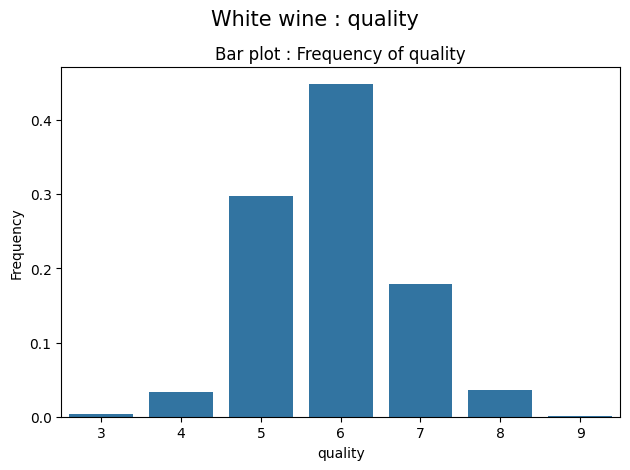

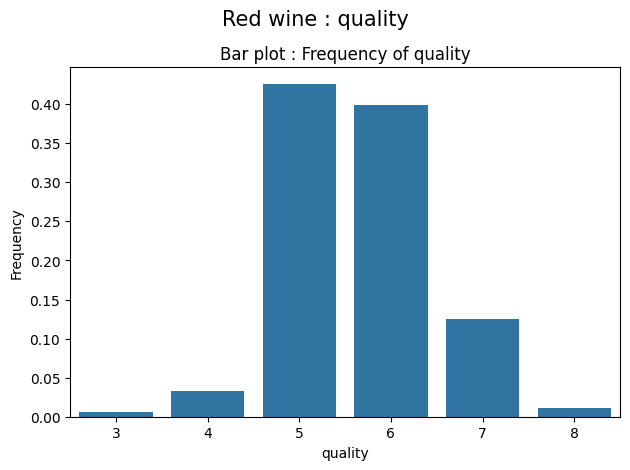

In [ ]:
bar_plot_discrete_variables(WHITE_WINE['quality'], 'White wine : quality', 'quality')
bar_plot_discrete_variables(RED_WINE['quality'], 'Red wine : quality', 'quality')

On crée maintenant une fonction affichant un camembert des variables catégorielles de qualités précédemment crées :

In [ ]:
def plot_Categorial_distribution(data, title):
    frequencies = data.value_counts(normalize=True)
    fig, ax = plt.subplots(2,1,figsize=(12,6))
    ax[0].pie(frequencies, labels=frequencies.index, autopct='%1.1f%%')
    ax[0].set_title(f'Pie Chart of {title}')
    sns.barplot(x=frequencies.index, y=frequencies.values, ax=ax[1])
    ax[1].set_title(f'Bar Chart of {title}')
    plt.suptitle(f'Variable catégorielle : {title}', fontsize=15, y=0.97)  # Ajout du titre global
    plt.tight_layout()
    plt.show()

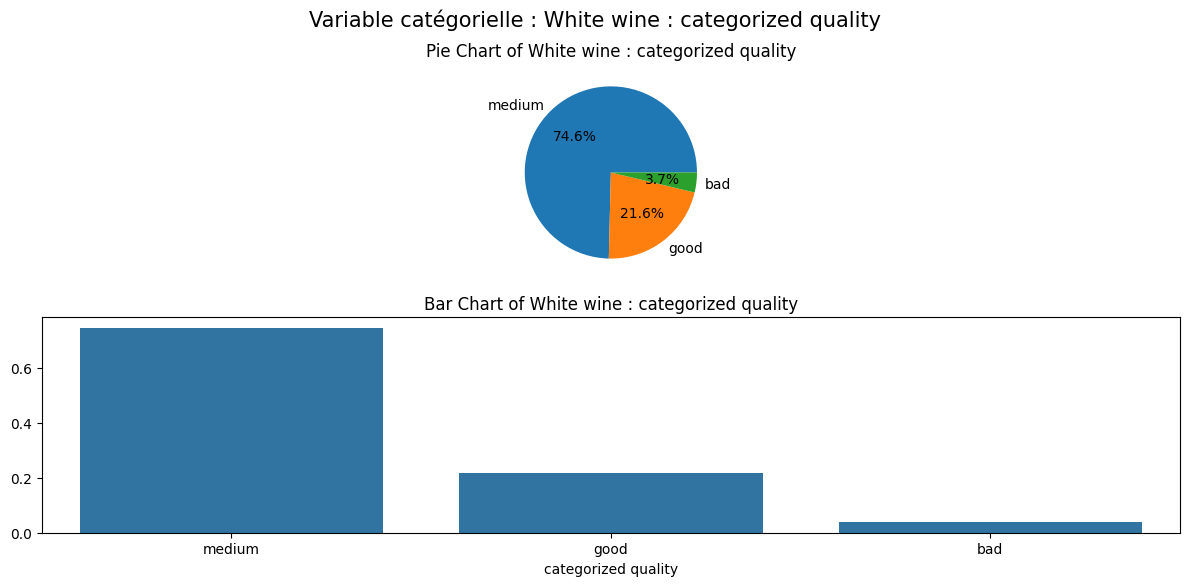

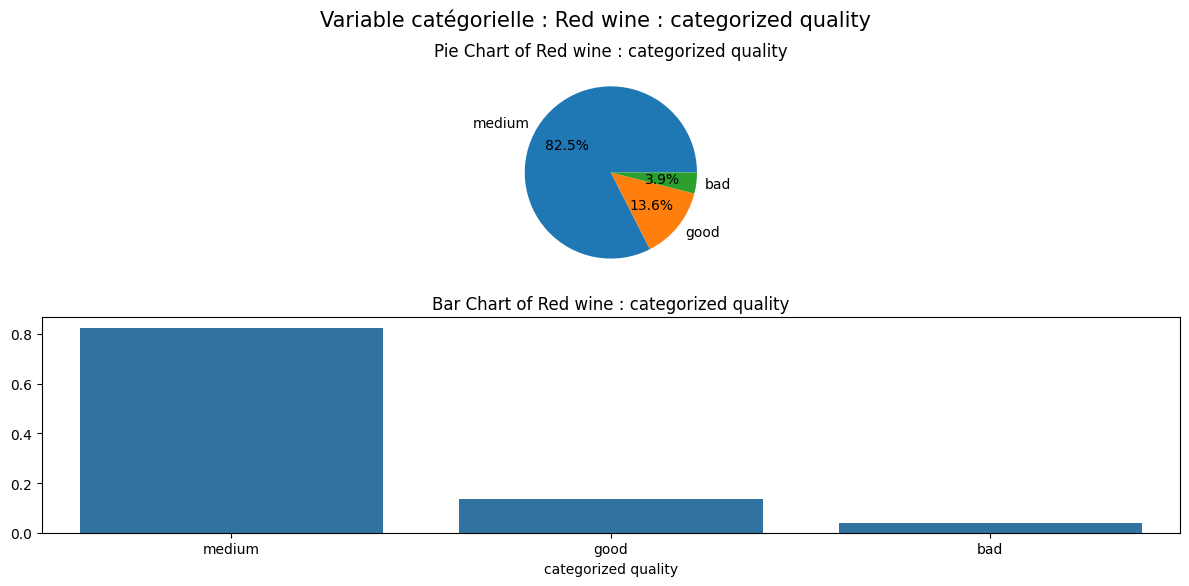

In [ ]:
plot_Categorial_distribution(all_data_white['categorized quality'], 'White wine : categorized quality')
plot_Categorial_distribution(all_data_red['categorized quality'], 'Red wine : categorized quality')

### Table de l'ANOVA

On sépare la population en 3 groupes en fonction de la qualité. Le premier groupe comprendra les vins de bonne qualité, le second ceux de qualité médium et le dernier les vins de mauvaise qualité en se servant de la varibale catégorielle précédemment créée.

On définit l'hypothèse nulle et l'hypotèse alternative comme ci-dessous :
 - **H0** : les densités moyennes des 3 groupes sont égales
 - **H1** : Au moins 2 groupes on des densités moyennes différentes

On réalise l'analyse ANOVA sur les deux bases de données pour étudier la relation entre la densité des vins rouges et leur qualité catégorisée. La fonction prend database comme paramètre et retourne les résultats de l'ANOVA ainsi que l'interprétation des résultats.

In [ ]:
from statsmodels.formula.api import ols

def analyze_wine_density(database, name):
    # Définir le modèle
    model = ols("density ~ Q('categorized quality')", data=database).fit()
    
    # Effectuer l'ANOVA
    anova_table = sm.stats.anova_lm(model, typ=2)
    print(f'\nTableau ANOVA {name} :')
    print(anova_table)
    
    # Extraire les groupes de densité selon la qualité catégorisée
    quality_density = {
        'good': database[database['categorized quality'] == 'good']['density'],
        'medium': database[database['categorized quality'] == 'medium']['density'],
        'bad': database[database['categorized quality'] == 'bad']['density']
    }
    
    # Effectuer le test ANOVA
    f_value, p_value = stats.f_oneway(
        quality_density['good'], 
        quality_density['medium'], 
        quality_density['bad']
    )
    
    print(f'\nValeur F : {f_value:0.4f}, Valeur p : {p_value:.2e}')
    
    # Interprétation des résultats
    alpha = 0.05
    if p_value < alpha:
        interpretation = (
            "Au risque de première espèce de 5%, la densité moyenne diffère significativement "
            "entre les vins des 3 indexs de qualité."
        )
    else:
        interpretation = (
            "Au risque de 5%, il n'y a aucune différence significative des densités "
            "entre les vins des 3 indexs de qualité."
        )
    
    print(interpretation)
    return


In [ ]:
analyze_wine_density(all_data_red, "Vins rouges")
analyze_wine_density(all_data_white, "Vins blancs")


Tableau ANOVA Vins rouges :
                            sum_sq      df          F        PR(>F)
Q('categorized quality')  0.000131     2.0  18.765167  8.805122e-09
Residual                  0.005561  1596.0        NaN           NaN

Valeur F : 18.7652, Valeur p : 8.81e-09
Au risque de première espèce de 5%, la densité moyenne diffère significativement entre les vins des 3 indexs de qualité.

Tableau ANOVA Vins blancs :
                            sum_sq      df           F        PR(>F)
Q('categorized quality')  0.003533     2.0  214.728119  4.083385e-90
Residual                  0.040273  4895.0         NaN           NaN

Valeur F : 214.7281, Valeur p : 4.08e-90
Au risque de première espèce de 5%, la densité moyenne diffère significativement entre les vins des 3 indexs de qualité.


Ainsi, on rejette l'hypothèse H0 au risque de première espèce de 5% dans les deux cas. Au moins de groupes de qualités différentes ont des densités significativements différentes.